In [1]:
import np
import pandas as pd

# Chargement des données
ch4_data = pd.read_csv('ch4_mm_gl.csv')
co2_data = pd.read_csv('co2_mm_mlo.csv')
n2o_data = pd.read_csv('n2o_mm_gl.csv')
sf6_data = pd.read_csv('sf6_mm_gl.csv')

# Affichage des premières lignes de chaque jeu de données
print("CH4 Data:", ch4_data.head(), "\n")
print("CO2 Data:", co2_data.head(), "\n")
print("N2O Data:", n2o_data.head(), "\n")
print("SF6 Data:", sf6_data.head(), "\n")

# Informations sur les jeux de données
print("CH4 Data Info:", ch4_data.info(), "\n")
print("CO2 Data Info:", co2_data.info(), "\n")
print("N2O Data Info:", n2o_data.info(), "\n")
print("SF6 Data Info:", sf6_data.info(), "\n")


CH4 Data:    year  month   decimal  average  average_unc    trend  trend_unc
0  1983      7  1983.542  1625.95         2.26  1635.15       1.45
1  1983      8  1983.625  1628.06         2.88  1635.66       1.39
2  1983      9  1983.708  1638.42         2.34  1636.21       1.32
3  1983     10  1983.792  1644.80         1.50  1636.83       1.24
4  1983     11  1983.875  1642.60         0.73  1637.52       1.16 

CO2 Data:    year  month  decimal date  average  deseasonalized  ndays  sdev   unc
0  1958      3     1958.2027   315.71          314.44     -1 -9.99 -0.99
1  1958      4     1958.2877   317.45          315.16     -1 -9.99 -0.99
2  1958      5     1958.3699   317.51          314.69     -1 -9.99 -0.99
3  1958      6     1958.4548   317.27          315.15     -1 -9.99 -0.99
4  1958      7     1958.5370   315.87          315.20     -1 -9.99 -0.99 

N2O Data:    year  month   decimal  average  average_unc   trend  trend_unc
0  2001      1  2001.042   316.30         0.16  316.03      

2. Sélection des Variables

Nous allons maintenant ne conserver que les variables "month" et "average" pour chaque jeu de données, et supprimer les autres.

In [2]:
# Sélection des variables
ch4_data = ch4_data[['month', 'average']]
co2_data = co2_data[['month', 'average']]
n2o_data = n2o_data[['month', 'average']]
sf6_data = sf6_data[['month', 'average']]

# Vérification des données
print("CH4 Data:", ch4_data.head(), "\n")
print("CO2 Data:", co2_data.head(), "\n")
print("N2O Data:", n2o_data.head(), "\n")
print("SF6 Data:", sf6_data.head(), "\n")


CH4 Data:    month  average
0      7  1625.95
1      8  1628.06
2      9  1638.42
3     10  1644.80
4     11  1642.60 

CO2 Data:    month  average
0      3   315.71
1      4   317.45
2      5   317.51
3      6   317.27
4      7   315.87 

N2O Data:    month  average
0      1   316.30
1      2   316.31
2      3   316.21
3      4   316.12
4      5   316.11 

SF6 Data:    month  average
0      7     4.00
1      8     4.00
2      9     4.02
3     10     4.05
4     11     4.08 



3. Documentation et Présentation des Gaz

Méthane (CH4)
Formule chimique: CH4
Effets sur l'atmosphère: Le méthane est un gaz à effet de serre puissant avec un potentiel de réchauffement global (PRG) 25 fois supérieur à celui du CO2 sur une période de 100 ans.
Unité de mesure: Parties par million (ppm)
Dioxyde de Carbone (CO2)
Formule chimique: CO2
Effets sur l'atmosphère: Principal gaz à effet de serre d'origine anthropique, le CO2 contribue de manière significative au réchauffement climatique.
Unité de mesure: Parties par million (ppm)
Protoxyde d'Azote (N2O)
Formule chimique: N2O
Effets sur l'atmosphère: Gaz à effet de serre avec un PRG environ 298 fois celui du CO2 sur une période de 100 ans. Il joue également un rôle dans la destruction de la couche d'ozone.
Unité de mesure: Parties par milliard (ppb)
Hexafluorure de Soufre (SF6)
Formule chimique: SF6
Effets sur l'atmosphère: Gaz à effet de serre extrêmement puissant avec un PRG de 23 500 sur une période de 100 ans.
Unité de mesure: Parties par trillion (ppt)
4. Représentation Graphique

Représentons chaque jeu de données par un nuage de points.

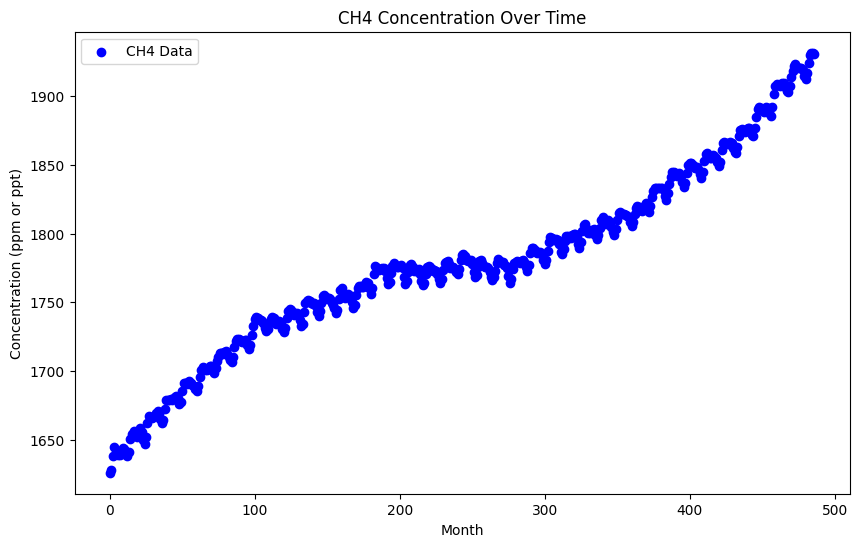

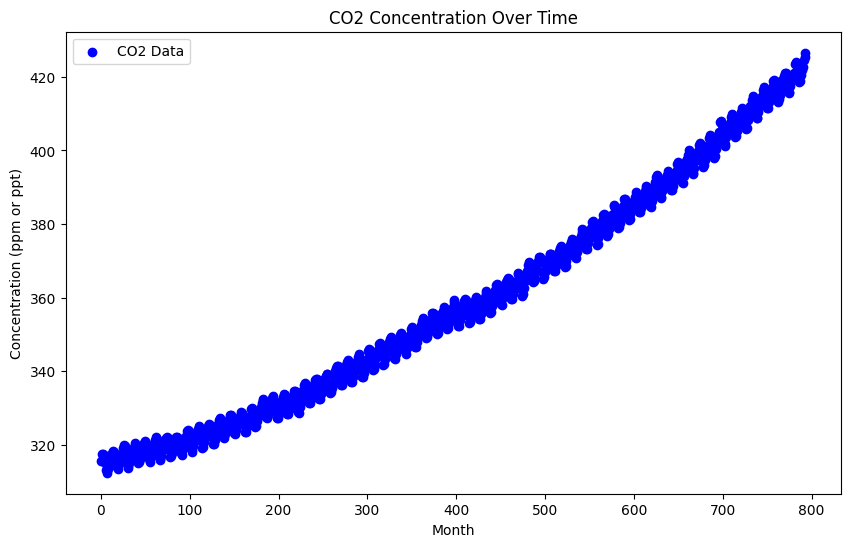

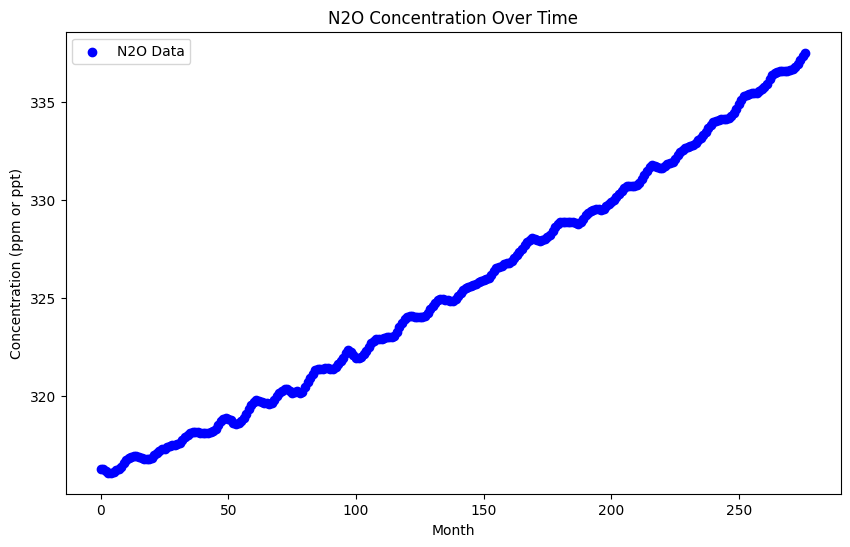

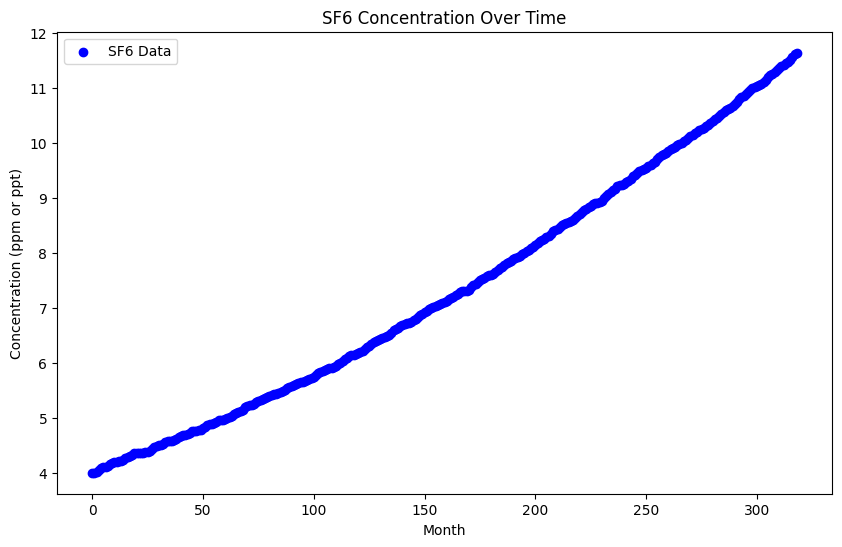

In [3]:
import matplotlib.pyplot as plt
def plot_data(data, gas_name):
    plt.figure(figsize=(10, 6))
    plt.scatter(data.index, data['average'], color='blue', label=f'{gas_name} Data')
    plt.title(f'{gas_name} Concentration Over Time')
    plt.xlabel('Month')
    plt.ylabel('Concentration (ppm or ppt)')
    plt.legend()
    plt.show()

plot_data(ch4_data, 'CH4')
plot_data(co2_data, 'CO2')
plot_data(n2o_data, 'N2O')
plot_data(sf6_data, 'SF6')

Interprétation des Résultats
Les représentations graphiques montrent des tendances globales d'augmentation pour tous les gaz. Les variations saisonnières sont particulièrement visibles pour le CO2 et le CH4.

5. Décomposition des Séries Temporelles

Nous allons maintenant nous concentrer sur le CO2 et le CH4 pour analyser leurs variations saisonnières.

5.1 Calcul de la Moyenne Mobile

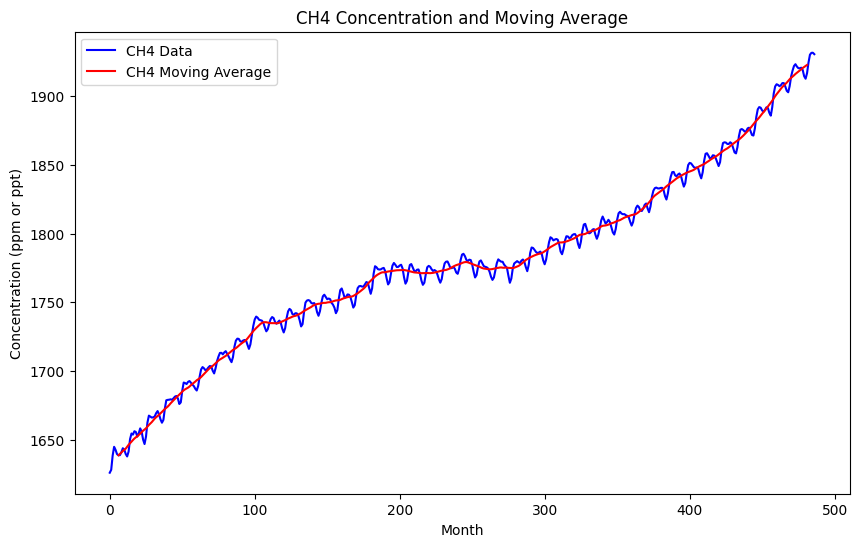

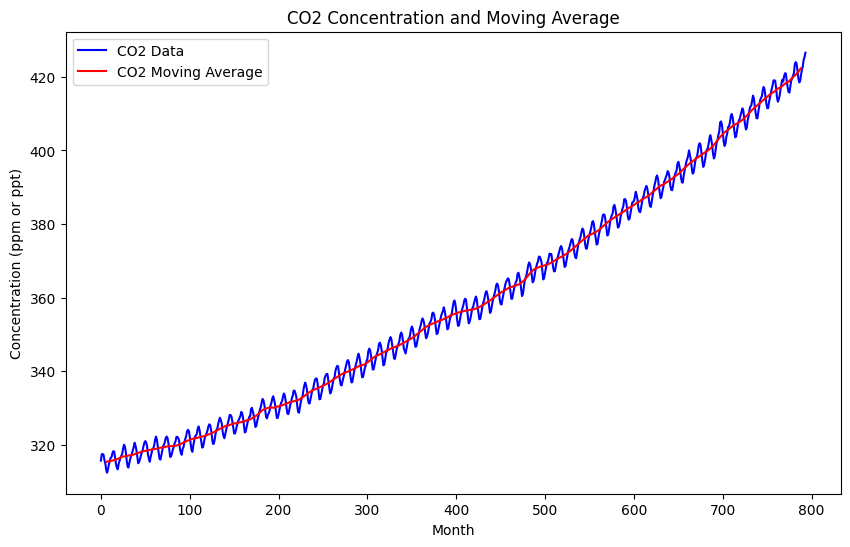

In [4]:
def calculate_moving_average(data, window_size=12):
    return data['average'].rolling(window=window_size, center=True).mean()

ch4_data['moving_average'] = calculate_moving_average(ch4_data)
co2_data['moving_average'] = calculate_moving_average(co2_data)

# Plot the moving averages
def plot_moving_average(data, gas_name):
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data['average'], color='blue', label=f'{gas_name} Data')
    plt.plot(data.index, data['moving_average'], color='red', label=f'{gas_name} Moving Average')
    plt.title(f'{gas_name} Concentration and Moving Average')
    plt.xlabel('Month')
    plt.ylabel('Concentration (ppm or ppt)')
    plt.legend()
    plt.show()

plot_moving_average(ch4_data, 'CH4')
plot_moving_average(co2_data, 'CO2')

5.2 Série Privée de sa Série Lissée

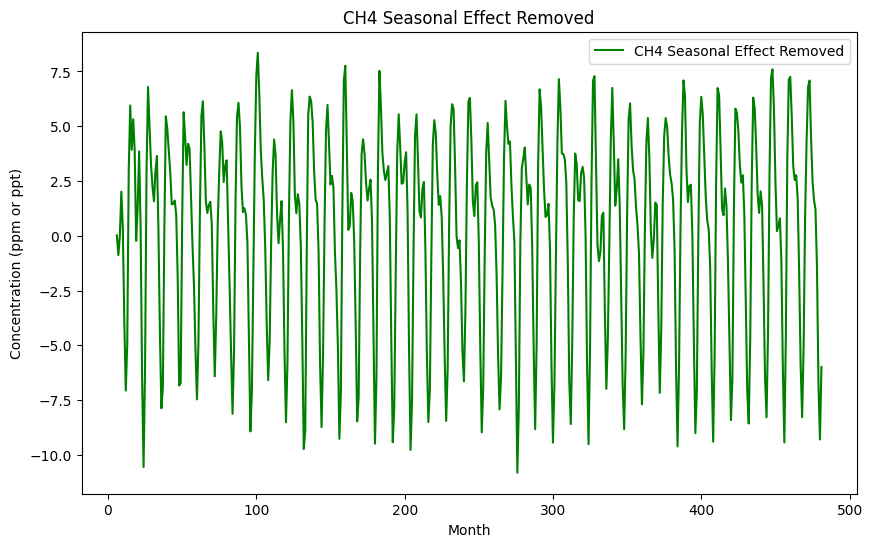

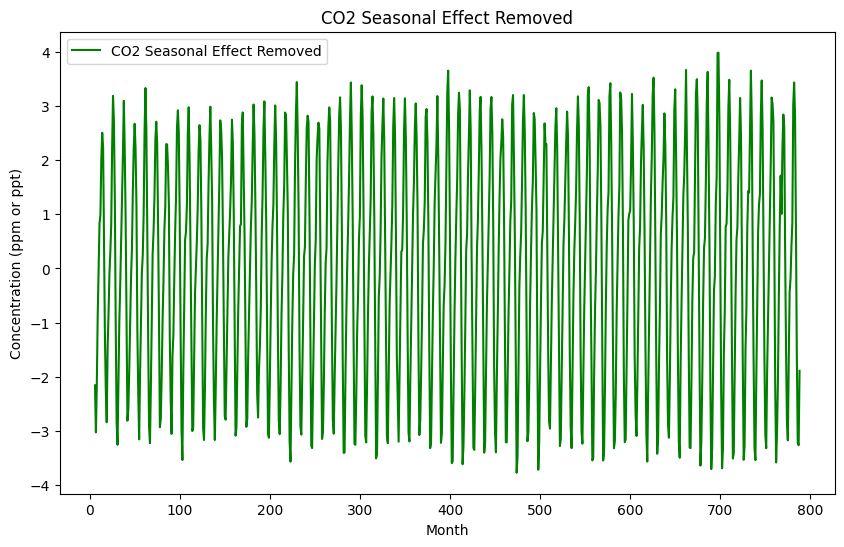

In [5]:
def remove_seasonal_effect(data):
    data['seasonal_removed'] = data['average'] - data['moving_average']
    return data

ch4_data = remove_seasonal_effect(ch4_data)
co2_data = remove_seasonal_effect(co2_data)
def plot_seasonal_removed(data, gas_name):
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data['seasonal_removed'], color='green', label=f'{gas_name} Seasonal Effect Removed')
    plt.title(f'{gas_name} Seasonal Effect Removed')
    plt.xlabel('Month')
    plt.ylabel('Concentration (ppm or ppt)')
    plt.legend()
    plt.show()

plot_seasonal_removed(ch4_data, 'CH4')
plot_seasonal_removed(co2_data, 'CO2')


5.3 Calcul des Coefficients Mensuels


In [6]:
def calculate_seasonal_coefficients(data):
    monthly_averages = data.groupby(data.index % 12)['seasonal_removed'].mean()
    overall_average = monthly_averages.mean()
    corrected_coefficients = monthly_averages - overall_average
    return corrected_coefficients

ch4_seasonal_coefficients = calculate_seasonal_coefficients(ch4_data)
co2_seasonal_coefficients = calculate_seasonal_coefficients(co2_data)

print("CH4 Seasonal Coefficients:", ch4_seasonal_coefficients)
print("CO2 Seasonal Coefficients:", co2_seasonal_coefficients)


CH4 Seasonal Coefficients: 0    -8.837218
1    -6.180322
2     0.494198
3     4.836826
4     5.543749
5     4.270053
6     2.212678
7     1.321324
8     1.536907
9     1.259491
10   -0.993009
11   -5.464676
Name: seasonal_removed, dtype: float64
CO2 Seasonal Coefficients: 0     1.426403
1     2.586801
2     3.037775
3     2.334121
4     0.659929
5    -1.505379
6    -3.170260
7    -3.255550
8    -2.048177
9    -0.864905
10    0.079621
11    0.719621
Name: seasonal_removed, dtype: float64


5.4 Calcul des Coefficients Mensuels Corrigés


In [7]:
def calculate_corrected_coefficients(monthly_coefficients):
    overall_average = monthly_coefficients.mean()
    corrected_coefficients = monthly_coefficients - overall_average
    return corrected_coefficients

ch4_corrected_coefficients = calculate_corrected_coefficients(ch4_seasonal_coefficients)
co2_corrected_coefficients = calculate_corrected_coefficients(co2_seasonal_coefficients)

print("CH4 Corrected Coefficients:", ch4_corrected_coefficients)
print("CO2 Corrected Coefficients:", co2_corrected_coefficients)


CH4 Corrected Coefficients: 0    -8.837218
1    -6.180322
2     0.494198
3     4.836826
4     5.543749
5     4.270053
6     2.212678
7     1.321324
8     1.536907
9     1.259491
10   -0.993009
11   -5.464676
Name: seasonal_removed, dtype: float64
CO2 Corrected Coefficients: 0     1.426403
1     2.586801
2     3.037775
3     2.334121
4     0.659929
5    -1.505379
6    -3.170260
7    -3.255550
8    -2.048177
9    -0.864905
10    0.079621
11    0.719621
Name: seasonal_removed, dtype: float64


5.5 Série Corrigée des Variations Saisonnières


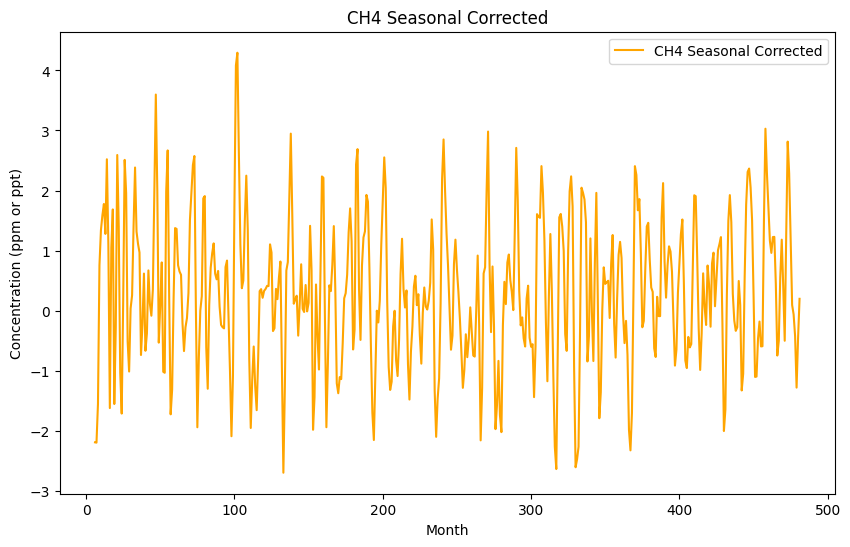

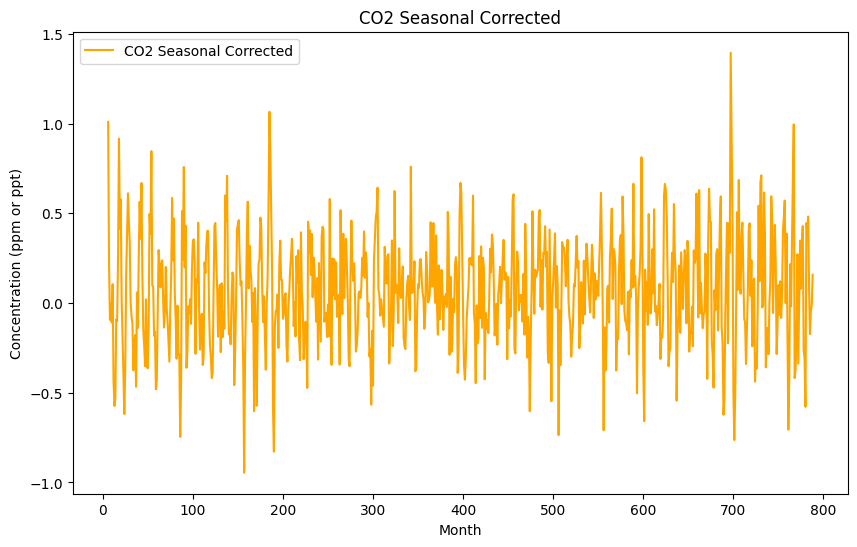

In [8]:
def correct_seasonal_variation(data, corrected_coefficients):
    data['seasonal_corrected'] = data['seasonal_removed'] - data.index.map(lambda x: corrected_coefficients[x % 12])
    return data

ch4_data = correct_seasonal_variation(ch4_data, ch4_corrected_coefficients)
co2_data = correct_seasonal_variation(co2_data, co2_corrected_coefficients)

def plot_seasonal_corrected(data, gas_name):
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data['seasonal_corrected'], color='orange', label=f'{gas_name} Seasonal Corrected')
    plt.title(f'{gas_name} Seasonal Corrected')
    plt.xlabel('Month')
    plt.ylabel('Concentration (ppm or ppt)')
    plt.legend()
    plt.show()

plot_seasonal_corrected(ch4_data, 'CH4')
plot_seasonal_corrected(co2_data, 'CO2')


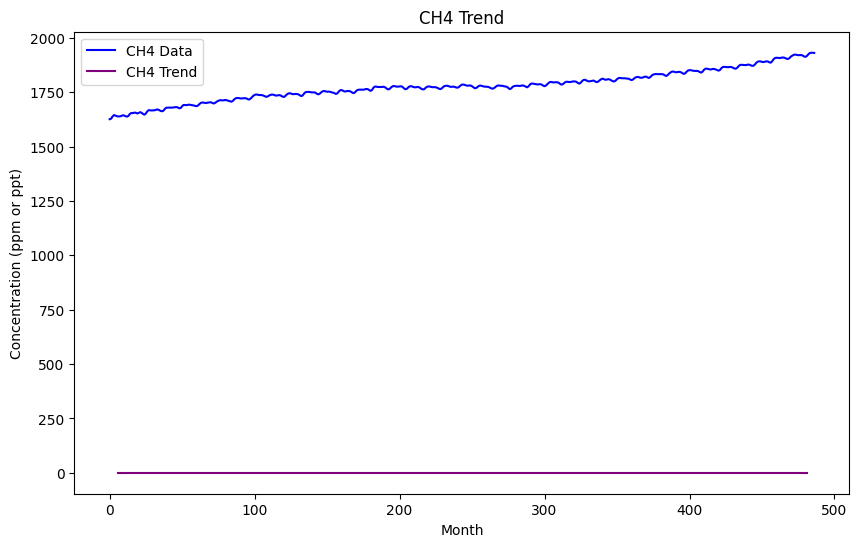

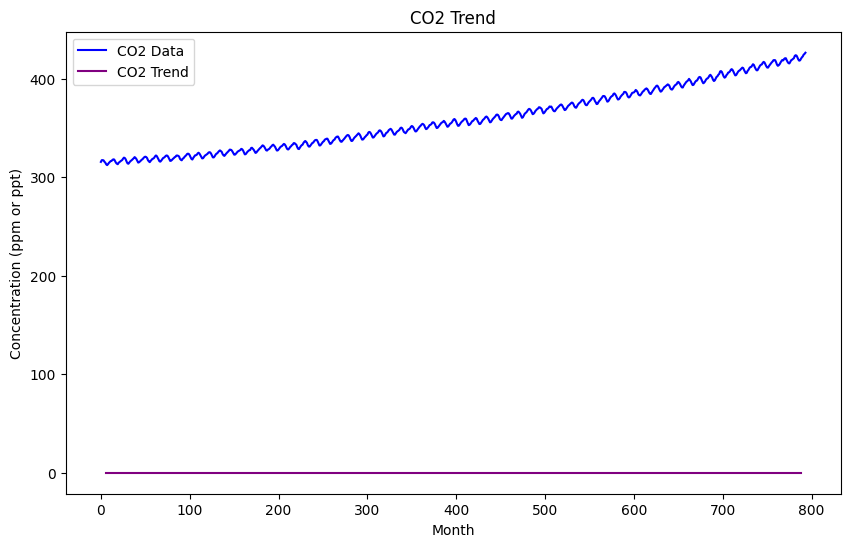

In [9]:
from sklearn.linear_model import LinearRegression

def calculate_trend(data):
    X = np.array(data.dropna().index).reshape(-1, 1)  # Utiliser uniquement les indices des valeurs non-NaN
    y = data['seasonal_corrected'].dropna()
    model = LinearRegression().fit(X, y)
    trend = model.predict(X)
    return trend, X

ch4_trend, ch4_trend_index = calculate_trend(ch4_data)
co2_trend, co2_trend_index = calculate_trend(co2_data)

# Ajouter la tendance aux données en utilisant les indices alignés
ch4_data['trend'] = pd.Series(data=ch4_trend, index=ch4_trend_index.flatten())
co2_data['trend'] = pd.Series(data=co2_trend, index=co2_trend_index.flatten())

# Plot the trend
def plot_trend(data, gas_name):
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data['average'], color='blue', label=f'{gas_name} Data')
    plt.plot(data.index, data['trend'], color='purple', label=f'{gas_name} Trend')
    plt.title(f'{gas_name} Trend')
    plt.xlabel('Month')
    plt.ylabel('Concentration (ppm or ppt)')
    plt.legend()
    plt.show()

plot_trend(ch4_data, 'CH4')
plot_trend(co2_data, 'CO2')



5.7 Prévisions


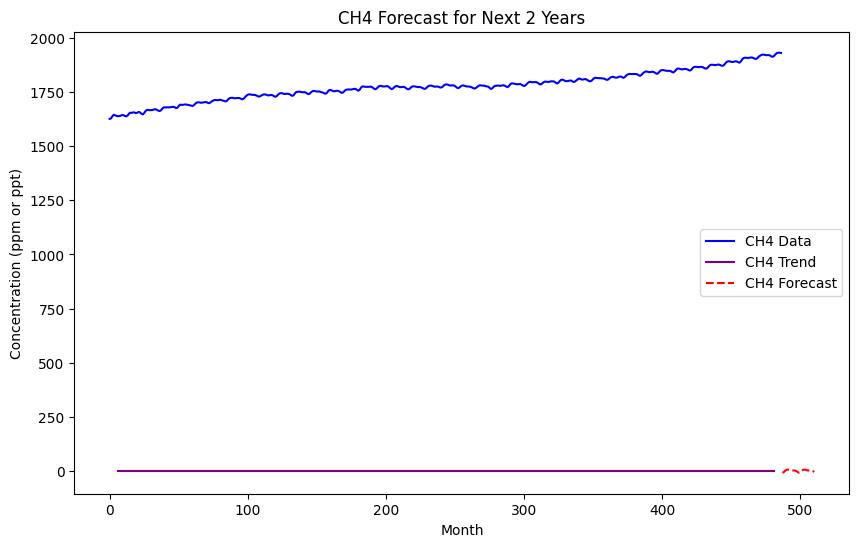

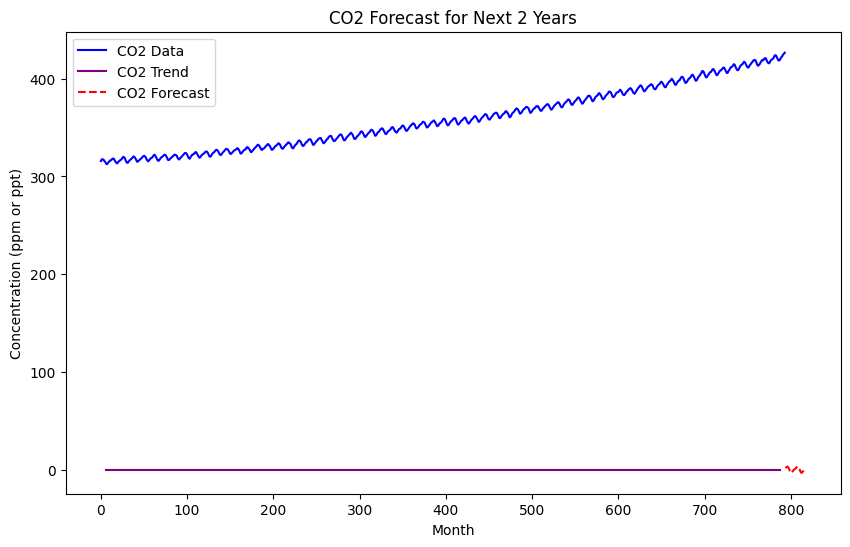

In [10]:
def forecast(data, trend, corrected_coefficients, months=24):
    last_index = data.index[-1]
    future_indices = range(last_index + 1, last_index + months + 1)
    
    # Calcul de la pente moyenne pour les prévisions linéaires
    average_slope = (trend.iloc[-1] - trend.iloc[0]) / (len(trend) - 1)
    
    # Calcul des prévisions de tendance pour les mois futurs
    future_trends = [trend.iloc[-1] + i * average_slope for i in range(1, months + 1)]
    
    # Correction des prévisions avec les coefficients saisonniers corrigés
    future_corrected = [future_trends[i] + corrected_coefficients[i % 12] for i in range(months)]
    return future_indices, future_corrected

future_indices_ch4, future_forecast_ch4 = forecast(ch4_data, ch4_data['trend'].dropna(), ch4_corrected_coefficients)
future_indices_co2, future_forecast_co2 = forecast(co2_data, co2_data['trend'].dropna(), co2_corrected_coefficients)

def plot_forecast(data, future_indices, future_forecast, gas_name):
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data['average'], color='blue', label=f'{gas_name} Data')
    plt.plot(data.index[:len(data['trend'])], data['trend'], color='purple', label=f'{gas_name} Trend')
    plt.plot(future_indices, future_forecast, color='red', linestyle='--', label=f'{gas_name} Forecast')
    plt.title(f'{gas_name} Forecast for Next 2 Years')
    plt.xlabel('Month')
    plt.ylabel('Concentration (ppm or ppt)')
    plt.legend()
    plt.show()

plot_forecast(ch4_data, future_indices_ch4, future_forecast_ch4, 'CH4')
plot_forecast(co2_data, future_indices_co2, future_forecast_co2, 'CO2')


5.8 Les variations saisonnières observées dans les concentrations de CH4 et de CO2 peuvent être dues à plusieurs facteurs, tels que les cycles de végétation, les émissions industrielles saisonnières, et les variations naturelles des sources et puits de ces gaz.


6. Décomposition Multiplicative

6.1 Série Lissée
La série lissée est calculée de la même manière que précédemment.

In [11]:
def calculate_multiplicative_moving_average(data, window_size=12):
    return data['average'].rolling(window=window_size, center=True).mean()

ch4_data['multiplicative_moving_average'] = calculate_multiplicative_moving_average(ch4_data)
co2_data['multiplicative_moving_average'] = calculate_multiplicative_moving_average(co2_data)


6.2 Série Divisée par sa Série Lissée


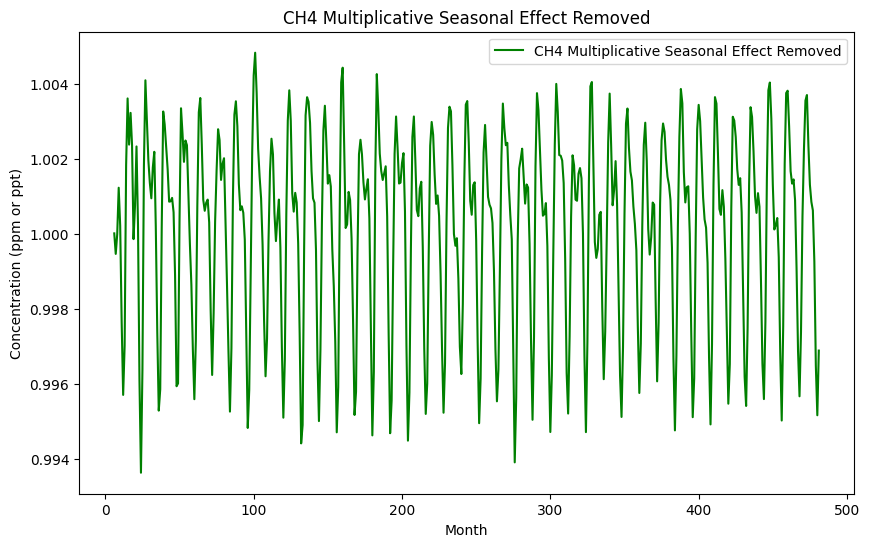

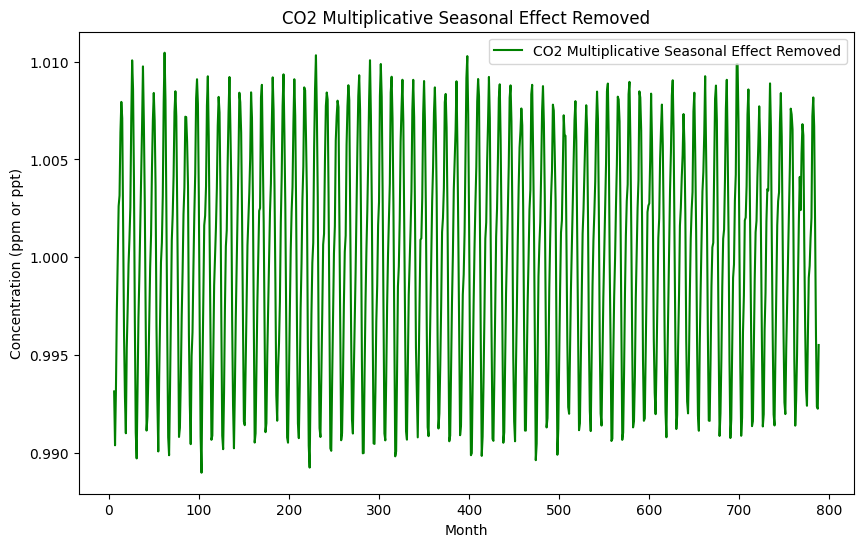

In [12]:
def remove_multiplicative_seasonal_effect(data):
    data['multiplicative_seasonal_removed'] = data['average'] / data['multiplicative_moving_average']
    return data

ch4_data = remove_multiplicative_seasonal_effect(ch4_data)
co2_data = remove_multiplicative_seasonal_effect(co2_data)

def plot_multiplicative_seasonal_removed(data, gas_name):
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data['multiplicative_seasonal_removed'], color='green', label=f'{gas_name} Multiplicative Seasonal Effect Removed')
    plt.title(f'{gas_name} Multiplicative Seasonal Effect Removed')
    plt.xlabel('Month')
    plt.ylabel('Concentration (ppm or ppt)')
    plt.legend()
    plt.show()

plot_multiplicative_seasonal_removed(ch4_data, 'CH4')
plot_multiplicative_seasonal_removed(co2_data, 'CO2')


6.3 Calcul des Coefficients Mensuels Multiplicatifs
Les coefficients mensuels multiplicatifs sont calculés de la même manière que pour la méthode additive.

In [13]:
def calculate_multiplicative_seasonal_coefficients(data):
    monthly_averages = data.groupby(data.index % 12)['multiplicative_seasonal_removed'].mean()
    overall_average = monthly_averages.mean()
    corrected_coefficients = monthly_averages / overall_average
    return corrected_coefficients

ch4_multiplicative_seasonal_coefficients = calculate_multiplicative_seasonal_coefficients(ch4_data)
co2_multiplicative_seasonal_coefficients = calculate_multiplicative_seasonal_coefficients(co2_data)

print("CH4 Multiplicative Seasonal Coefficients:", ch4_multiplicative_seasonal_coefficients)
print("CO2 Multiplicative Seasonal Coefficients:", co2_multiplicative_seasonal_coefficients)


CH4 Multiplicative Seasonal Coefficients: 0     0.995033
1     0.996519
2     1.000274
3     1.002720
4     1.003111
5     1.002397
6     1.001245
7     1.000741
8     1.000864
9     1.000713
10    0.999449
11    0.996935
Name: multiplicative_seasonal_removed, dtype: float64
CO2 Multiplicative Seasonal Coefficients: 0     1.003987
1     1.007223
2     1.008488
3     1.006533
4     1.001895
5     0.995844
6     0.991158
7     0.990892
8     0.994255
9     0.997550
10    1.000189
11    1.001986
Name: multiplicative_seasonal_removed, dtype: float64


6.4 Calcul des Coefficients Mensuels Corrigés
python

In [14]:
def calculate_multiplicative_corrected_coefficients(monthly_coefficients):
    overall_average = monthly_coefficients.mean()
    corrected_coefficients = monthly_coefficients / overall_average
    return corrected_coefficients

ch4_multiplicative_corrected_coefficients = calculate_multiplicative_corrected_coefficients(ch4_multiplicative_seasonal_coefficients)
co2_multiplicative_corrected_coefficients = calculate_multiplicative_corrected_coefficients(co2_multiplicative_seasonal_coefficients)

print("CH4 Multiplicative Corrected Coefficients:", ch4_multiplicative_corrected_coefficients)
print("CO2 Multiplicative Corrected Coefficients:", co2_multiplicative_corrected_coefficients)


CH4 Multiplicative Corrected Coefficients: 0     0.995033
1     0.996519
2     1.000274
3     1.002720
4     1.003111
5     1.002397
6     1.001245
7     1.000741
8     1.000864
9     1.000713
10    0.999449
11    0.996935
Name: multiplicative_seasonal_removed, dtype: float64
CO2 Multiplicative Corrected Coefficients: 0     1.003987
1     1.007223
2     1.008488
3     1.006533
4     1.001895
5     0.995844
6     0.991158
7     0.990892
8     0.994255
9     0.997550
10    1.000189
11    1.001986
Name: multiplicative_seasonal_removed, dtype: float64


6.5 Série Corrigée des Variations Saisonnières Multiplicatives


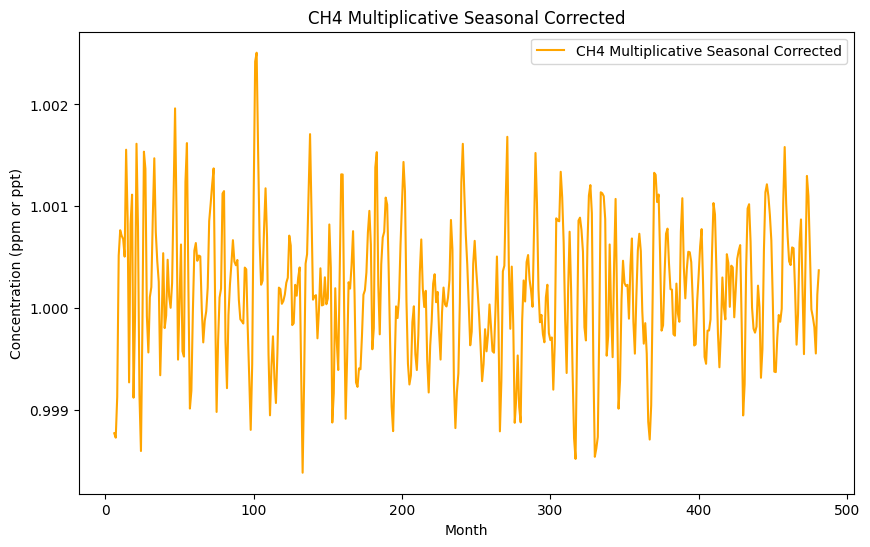

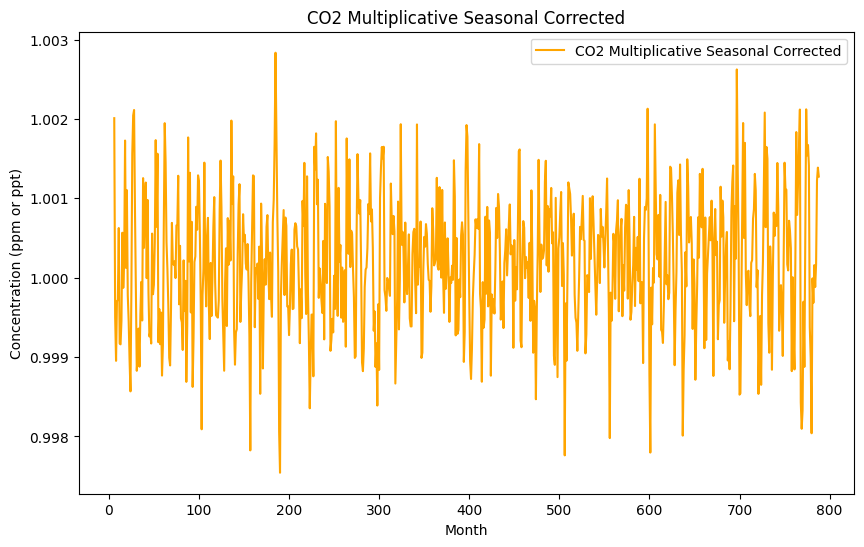

In [15]:
def correct_multiplicative_seasonal_variation(data, corrected_coefficients):
    data['multiplicative_seasonal_corrected'] = data['multiplicative_seasonal_removed'] / data.index.map(lambda x: corrected_coefficients[x % 12])
    return data

ch4_data = correct_multiplicative_seasonal_variation(ch4_data, ch4_multiplicative_corrected_coefficients)
co2_data = correct_multiplicative_seasonal_variation(co2_data, co2_multiplicative_corrected_coefficients)

def plot_multiplicative_seasonal_corrected(data, gas_name):
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data['multiplicative_seasonal_corrected'], color='orange', label=f'{gas_name} Multiplicative Seasonal Corrected')
    plt.title(f'{gas_name} Multiplicative Seasonal Corrected')
    plt.xlabel('Month')
    plt.ylabel('Concentration (ppm or ppt)')
    plt.legend()
    plt.show()

plot_multiplicative_seasonal_corrected(ch4_data, 'CH4')
plot_multiplicative_seasonal_corrected(co2_data, 'CO2')


6.6 Tendance (Trend) Multiplicative
La tendance est calculée de la même manière que pour la méthode additive.


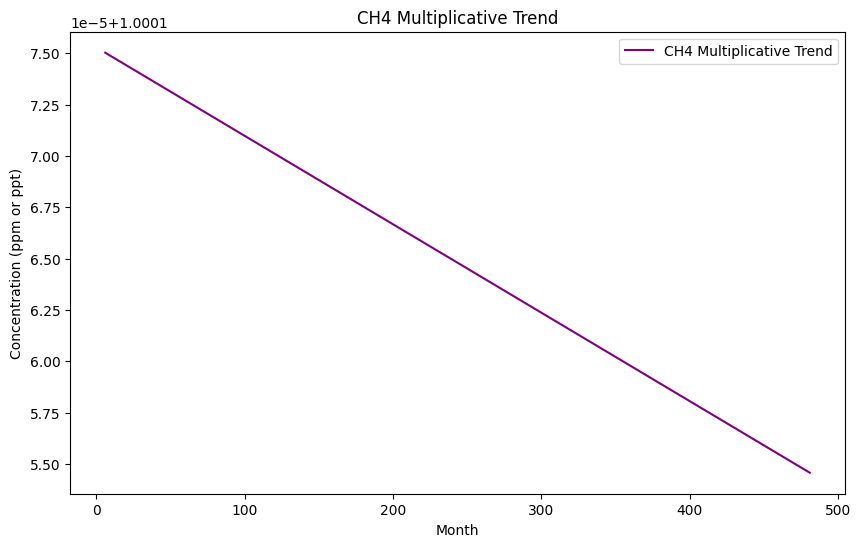

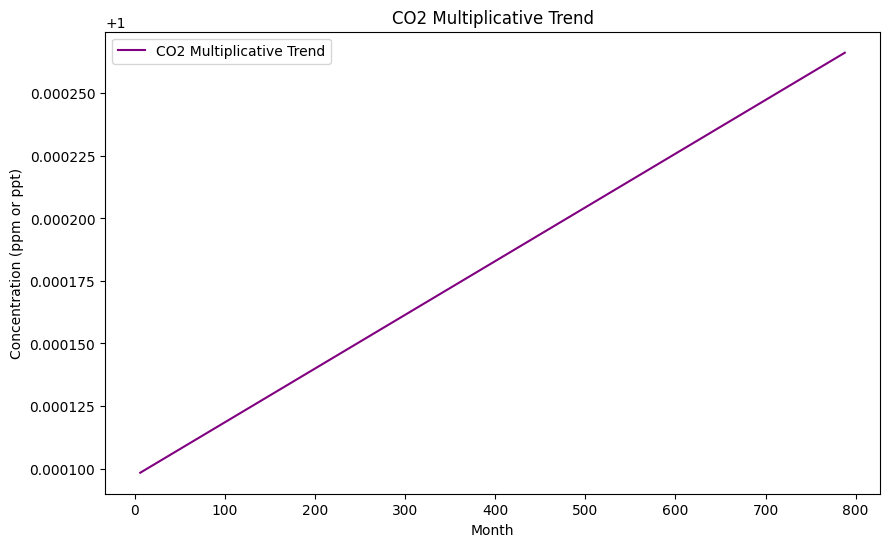

In [16]:
def calculate_multiplicative_trend(data):
    X = np.array(data.dropna(subset=['multiplicative_seasonal_corrected']).index).reshape(-1, 1)
    y = data['multiplicative_seasonal_corrected'].dropna()
    model = LinearRegression().fit(X, y)
    trend = model.predict(X)
    return trend

# Calculate trends ensuring the index length matches
ch4_trend_indices = ch4_data.dropna(subset=['multiplicative_seasonal_corrected']).index
co2_trend_indices = co2_data.dropna(subset=['multiplicative_seasonal_corrected']).index

ch4_data.loc[ch4_trend_indices, 'multiplicative_trend'] = calculate_multiplicative_trend(ch4_data)
co2_data.loc[co2_trend_indices, 'multiplicative_trend'] = calculate_multiplicative_trend(co2_data)

# Plot multiplicative trend
def plot_multiplicative_trend(data, gas_name):
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data['multiplicative_trend'], color='purple', label=f'{gas_name} Multiplicative Trend')
    plt.title(f'{gas_name} Multiplicative Trend')
    plt.xlabel('Month')
    plt.ylabel('Concentration (ppm or ppt)')
    plt.legend()
    plt.show()

plot_multiplicative_trend(ch4_data, 'CH4')
plot_multiplicative_trend(co2_data, 'CO2')


6.7 Prévisions Multiplicatives


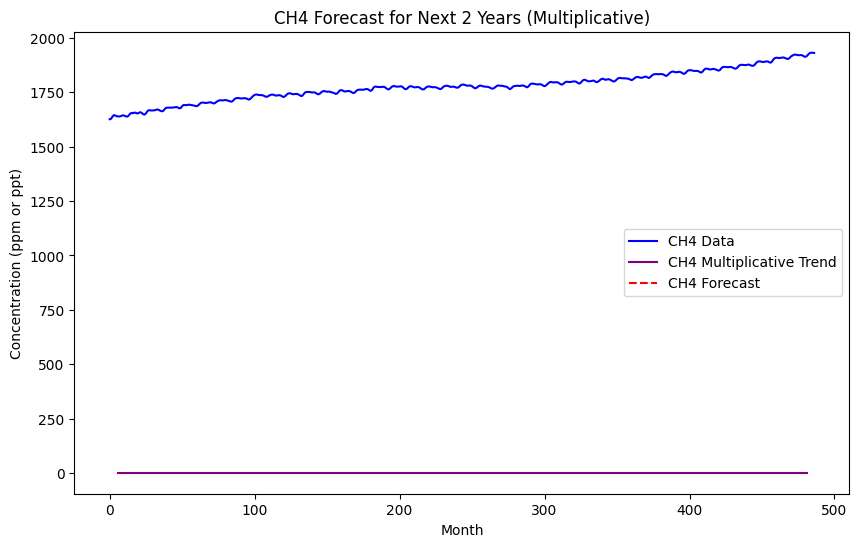

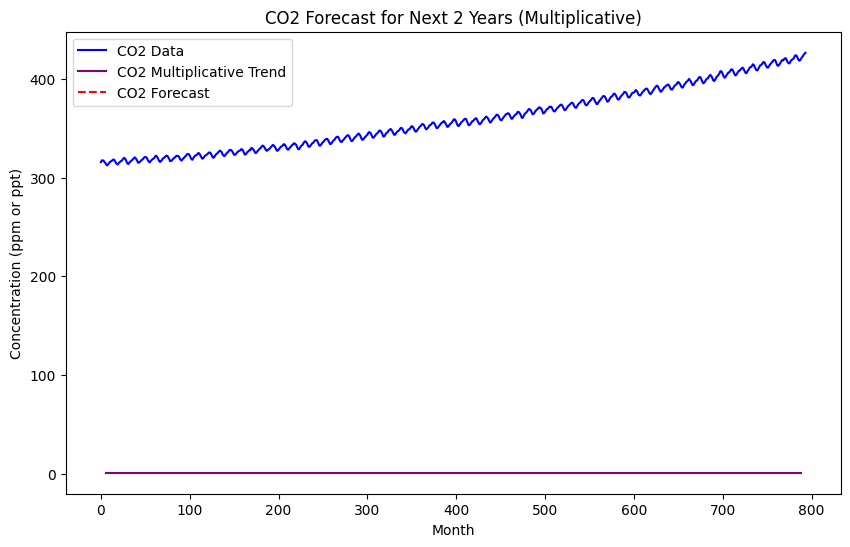

In [17]:
def forecast_multiplicative(data, trend, corrected_coefficients, months=24):
    last_index = len(data) - 1
    future_indices = [last_index + i for i in range(1, months + 1)]
    # Calculer les valeurs futures de la tendance
    growth_rate = trend.iloc[-1] / trend.iloc[-2]
    future_trends = [trend.iloc[-1] * (growth_rate ** i) for i in range(1, months + 1)]
    future_corrected = [future_trends[i] * corrected_coefficients[(last_index + i + 1) % 12] for i in range(months)]
    return future_indices, future_corrected

future_indices_ch4_multiplicative, future_forecast_ch4_multiplicative = forecast_multiplicative(ch4_data, ch4_data['multiplicative_trend'], ch4_multiplicative_corrected_coefficients)
future_indices_co2_multiplicative, future_forecast_co2_multiplicative = forecast_multiplicative(co2_data, co2_data['multiplicative_trend'], co2_multiplicative_corrected_coefficients)

def plot_forecast_multiplicative(data, future_indices, future_forecast, gas_name):
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data['average'], color='blue', label=f'{gas_name} Data')
    plt.plot(data.index[:len(data['multiplicative_trend'])], data['multiplicative_trend'], color='purple', label=f'{gas_name} Multiplicative Trend')
    plt.plot(future_indices, future_forecast, color='red', linestyle='--', label=f'{gas_name} Forecast')
    plt.title(f'{gas_name} Forecast for Next 2 Years (Multiplicative)')
    plt.xlabel('Month')
    plt.ylabel('Concentration (ppm or ppt)')
    plt.legend()
    plt.show()

plot_forecast_multiplicative(ch4_data, future_indices_ch4_multiplicative, future_forecast_ch4_multiplicative, 'CH4')
plot_forecast_multiplicative(co2_data, future_indices_co2_multiplicative, future_forecast_co2_multiplicative, 'CO2')


 7. Comparaison des Démarches

Comparaison entre les décompositions additives et multiplicatives.
 La décomposition additive est appropriée lorsque les variations saisonnières sont constantes en amplitude, tandis que la décomposition multiplicative est mieux adaptée lorsque ces variations augmentent ou diminuent proportionnellement à la tendance. En examinant les séries temporelles et les coefficients saisonniers obtenus, nous pouvons déterminer quelle méthode fournit la meilleure représentation des données pour chaque gaz.


8. Régression Linéaire (Gaz sans Variations Saisonnières)

Pour les gaz sans variations saisonnières évidentes, nous appliquons une régression linéaire pour modéliser les tendances globales.

8.1 Coefficient de Corrélation et Régression Linéaire

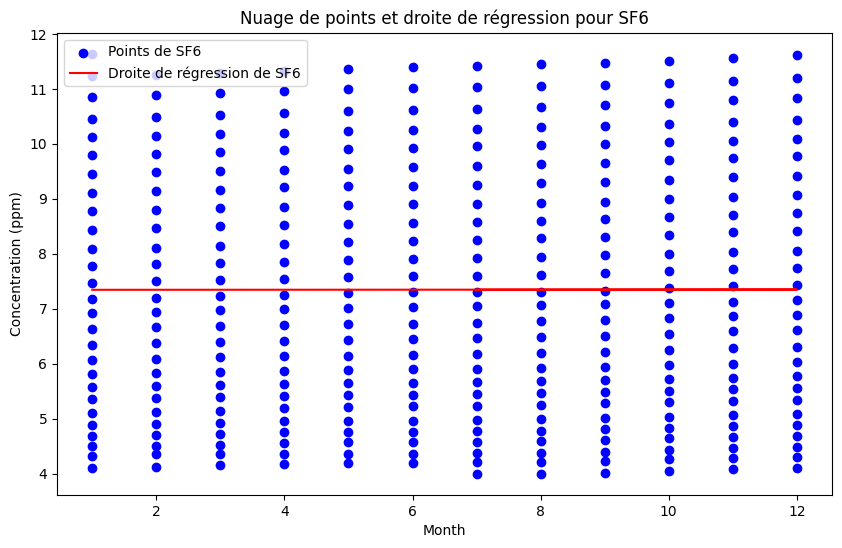

L'équation de la droite de régression pour SF6 est : y = 0.00x + 7.35


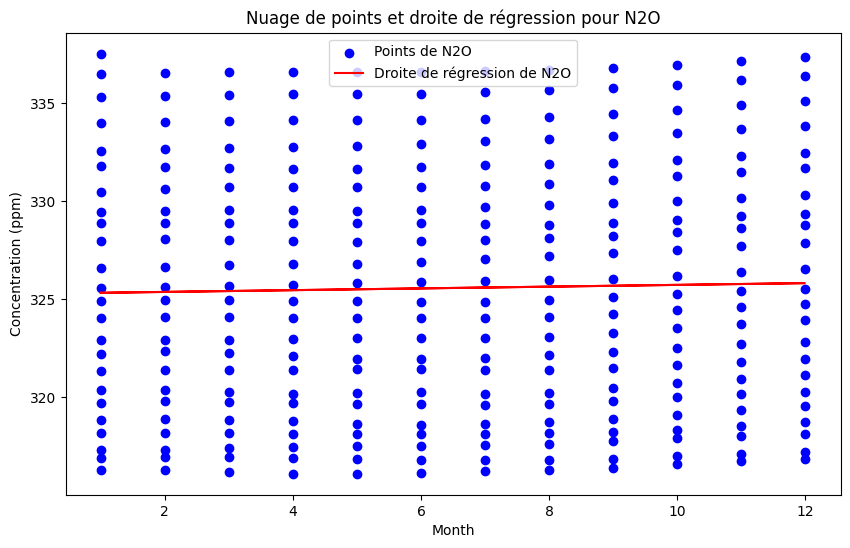

L'équation de la droite de régression pour N2O est : y = 0.04x + 325.28


In [18]:
def train_and_plot(data, gas_name):
    # Vérifier si les colonnes nécessaires sont présentes
    if 'month' not in data.columns or 'average' not in data.columns:
        print("Les colonnes nécessaires ne sont pas présentes dans les données.")
        return
    
    # Préparation des données
    data = data.dropna()
    
    if data.empty:
        print("Aucune donnée disponible après suppression des valeurs NaN.")
        return

    X = np.array(data['month']).reshape(-1, 1)
    y = data['average']

    # Entraînement du modèle
    model = LinearRegression().fit(X, y)

    # Calcul de la droite de régression
    trend_line = model.predict(X)

    # Tracer le nuage de points et la droite de régression
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='blue', label=f'Points de {gas_name}')
    plt.plot(X, trend_line, color='red', label=f'Droite de régression de {gas_name}')
    plt.title(f'Nuage de points et droite de régression pour {gas_name}')
    plt.xlabel('Month')
    plt.ylabel('Concentration (ppm)')
    plt.legend()
    plt.show()

    # Afficher l'équation de la droite
    slope = model.coef_[0]
    intercept = model.intercept_
    print(f"L'équation de la droite de régression pour {gas_name} est : y = {slope:.2f}x + {intercept:.2f}")

train_and_plot(sf6_data, 'SF6')
train_and_plot(n2o_data, 'N2O')


8.2 Prévisions Linéaires
Les prévisions linéaires sont incluses dans la fonction train_and_plot


8.3 Régression Exponentielle


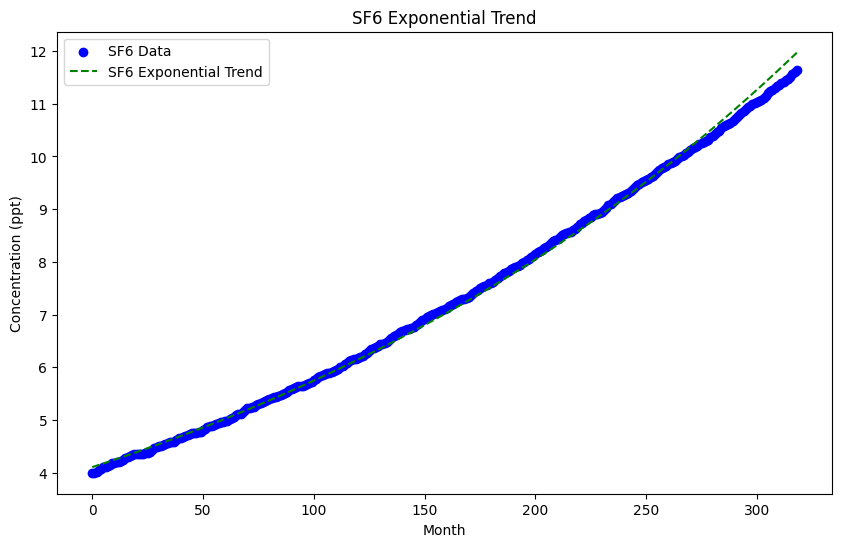

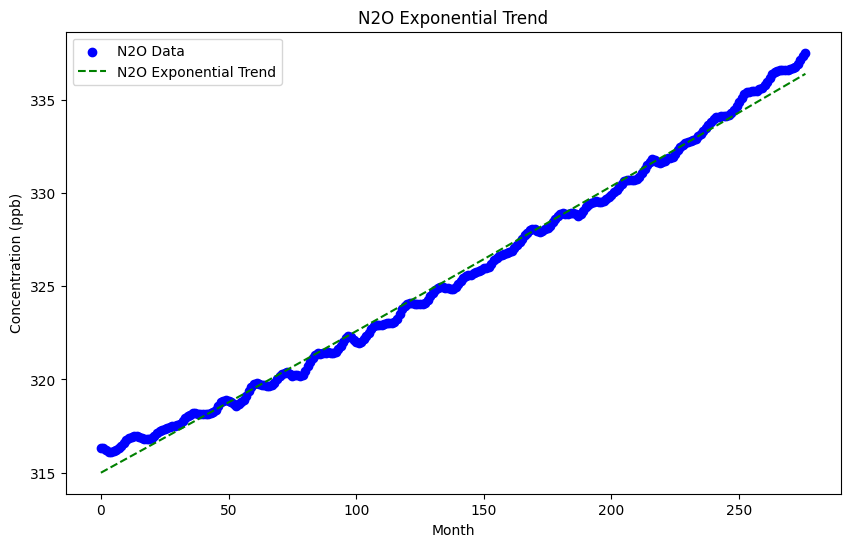

SF6 R-value Exp: 0.9983912423188248 

N2O R-value Exp: 0.9941551838934976 



In [19]:
from sklearn.linear_model import LinearRegression

def exponential_regression(data):
    X = np.array(data.index).reshape(-1, 1)
    y = np.log(data['average'])
    
    model = LinearRegression().fit(X, y)
    slope = model.coef_[0]
    intercept = model.intercept_
    r_value = model.score(X, y)
    
    trend_line = np.exp(slope * X + intercept).flatten()
    return trend_line, r_value, slope, intercept

sf6_trend_exp, sf6_r_value_exp, sf6_slope_exp, sf6_intercept_exp = exponential_regression(sf6_data)
n2o_trend_exp, n2o_r_value_exp, n2o_slope_exp, n2o_intercept_exp = exponential_regression(n2o_data)

# Ajout des lignes de tendance exponentielles aux données
sf6_data['trend_exp'] = sf6_trend_exp
n2o_data['trend_exp'] = n2o_trend_exp

# Tracé des lignes de tendance exponentielles
def plot_exponential_trend(data, gas_name, ylabel):
    plt.figure(figsize=(10, 6))
    plt.scatter(data.index, data['average'], color='blue', label=f'{gas_name} Data')
    plt.plot(data.index, data['trend_exp'], color='green', linestyle='--', label=f'{gas_name} Exponential Trend')
    plt.title(f'{gas_name} Exponential Trend')
    plt.xlabel('Month')
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

plot_exponential_trend(sf6_data, 'SF6', 'Concentration (ppt)')
plot_exponential_trend(n2o_data, 'N2O', 'Concentration (ppb)')

print("SF6 R-value Exp:", sf6_r_value_exp, "\n")
print("N2O R-value Exp:", n2o_r_value_exp, "\n")


La régression exponentielle est souvent plus pertinente pour les gaz à effet de serre en raison de leurs tendances exponentielles à long terme.

9. Étude des Variations Annuelles

Pour le CO2 et le CH4, nous allons agréger les données par année et mener une analyse similaire à celle des variations mensuelles.

9.1 Agrégation par Année

In [20]:
def aggregate_by_year(data):
    data['year'] = (data.index / 12).astype(int)
    yearly_data = data.groupby('year')['average'].mean().reset_index()
    return yearly_data

ch4_yearly = aggregate_by_year(ch4_data)
co2_yearly = aggregate_by_year(co2_data)


9.2 Analyse des Données Agrégées


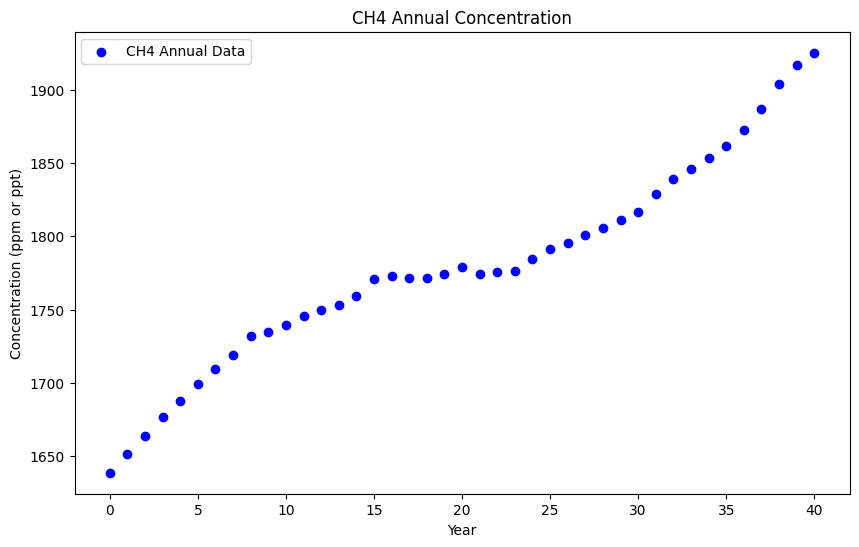

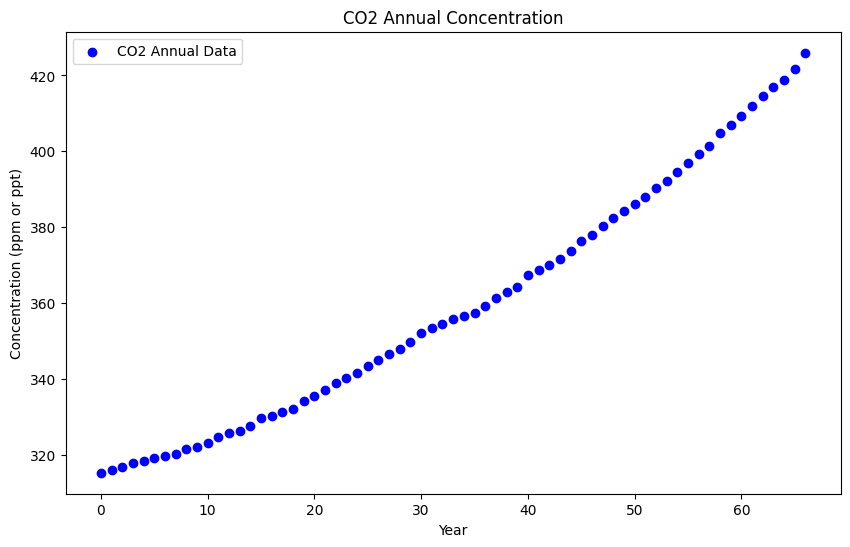

In [21]:
def plot_annual_variation(data, gas_name):
    plt.figure(figsize=(10, 6))
    plt.scatter(data['year'], data['average'], color='blue', label=f'{gas_name} Annual Data')
    plt.title(f'{gas_name} Annual Concentration')
    plt.xlabel('Year')
    plt.ylabel('Concentration (ppm or ppt)')
    plt.legend()
    plt.show()

plot_annual_variation(ch4_yearly, 'CH4')
plot_annual_variation(co2_yearly, 'CO2')


9.3 Prévisions Annuelles


In [22]:
def calculate_annual_correlation(data):
    X = data['year']
    y = data['average']
    correlation = np.corrcoef(X, y)[0, 1]
    return correlation

ch4_annual_correlation = calculate_annual_correlation(ch4_yearly)
co2_annual_correlation = calculate_annual_correlation(co2_yearly)

print("CH4 Annual Correlation:", ch4_annual_correlation)
print("CO2 Annual Correlation:", co2_annual_correlation)


CH4 Annual Correlation: 0.9730590893734989
CO2 Annual Correlation: 0.9899613105288899


9.4 Régression Exponentielle Annuelle
La régression exponentielle est également appliquée aux données annuelles.

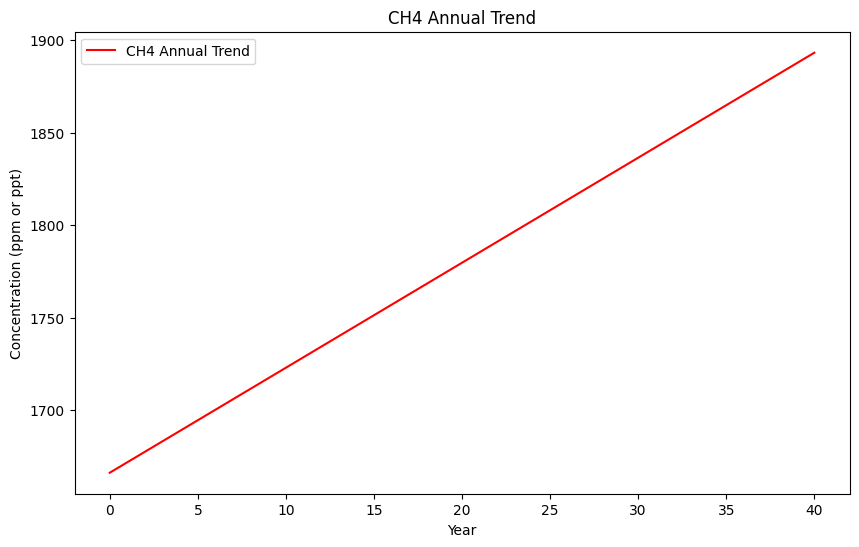

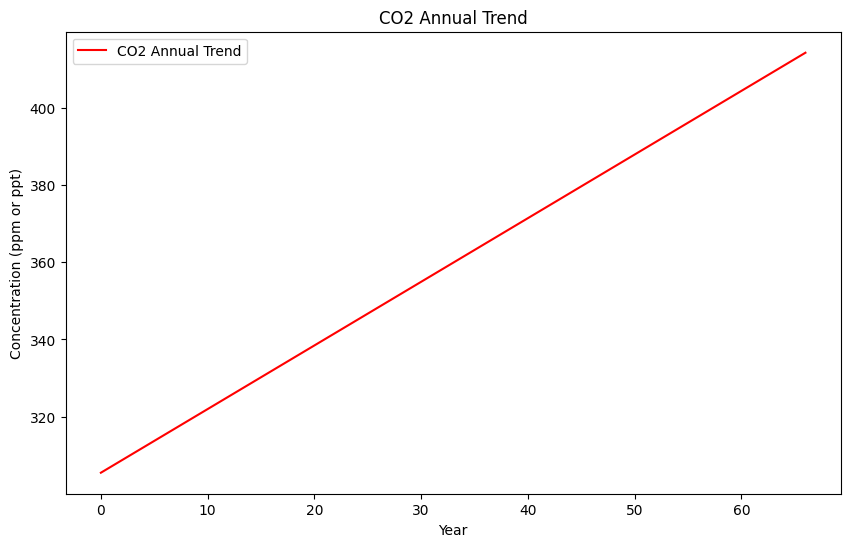

In [23]:
def calculate_annual_trend(data):
    X = np.array(data['year']).reshape(-1, 1)
    y = data['average']
    model = LinearRegression().fit(X, y)
    trend = model.predict(X)
    return trend

ch4_yearly['trend'] = calculate_annual_trend(ch4_yearly)
co2_yearly['trend'] = calculate_annual_trend(co2_yearly)

def plot_annual_trend(data, gas_name):
    plt.figure(figsize=(10, 6))
    plt.plot(data['year'], data['trend'], color='red', label=f'{gas_name} Annual Trend')
    plt.title(f'{gas_name} Annual Trend')
    plt.xlabel('Year')
    plt.ylabel('Concentration (ppm or ppt)')
    plt.legend()
    plt.show()

plot_annual_trend(ch4_yearly, 'CH4')
plot_annual_trend(co2_yearly, 'CO2')


9.5 : Prévisions Annuelles

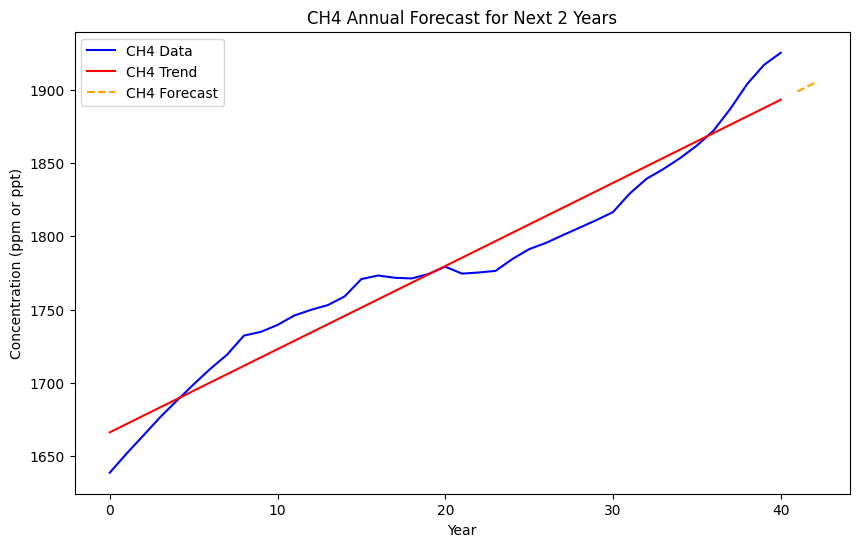

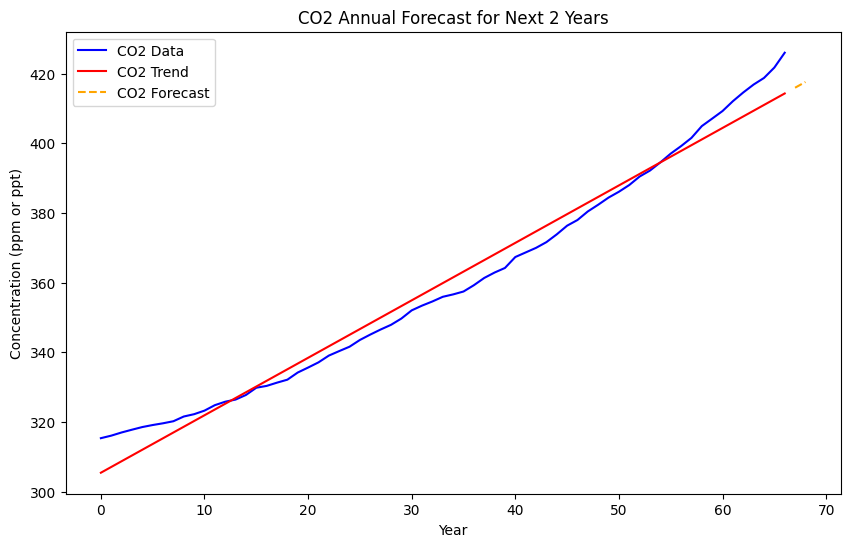

In [24]:
# Fonction pour calculer la tendance annuelle
def calculate_annual_trend(data):
    X = np.array(data['year']).reshape(-1, 1)
    y = data['average']
    model = LinearRegression().fit(X, y)
    trend = model.predict(X)
    return trend, model

# Calculer la tendance annuelle pour CH4 et CO2
ch4_yearly['trend'], ch4_model = calculate_annual_trend(ch4_yearly)
co2_yearly['trend'], co2_model = calculate_annual_trend(co2_yearly)

# Prévisions pour les deux prochaines années
def forecast_annual(data, model, years=2):
    last_year = data['year'].max()
    future_years = np.arange(last_year + 1, last_year + years + 1).reshape(-1, 1)
    future_trend = model.predict(future_years)
    return future_years.flatten(), future_trend

# Prévisions pour CH4 et CO2
future_years_ch4, future_trend_ch4 = forecast_annual(ch4_yearly, ch4_model)
future_years_co2, future_trend_co2 = forecast_annual(co2_yearly, co2_model)

# Fonction pour tracer les prévisions annuelles
def plot_annual_forecast(data, future_years, future_trend, gas_name):
    plt.figure(figsize=(10, 6))
    plt.plot(data['year'], data['average'], color='blue', label=f'{gas_name} Data')
    plt.plot(data['year'], data['trend'], color='red', label=f'{gas_name} Trend')
    plt.plot(future_years, future_trend, color='orange', linestyle='--', label=f'{gas_name} Forecast')
    plt.title(f'{gas_name} Annual Forecast for Next 2 Years')
    plt.xlabel('Year')
    plt.ylabel('Concentration (ppm or ppt)')
    plt.legend()
    plt.show()

# Tracer les prévisions pour CH4 et CO2
plot_annual_forecast(ch4_yearly, future_years_ch4, future_trend_ch4, 'CH4')
plot_annual_forecast(co2_yearly, future_years_co2, future_trend_co2, 'CO2')


9.6:Régression Exponentielle

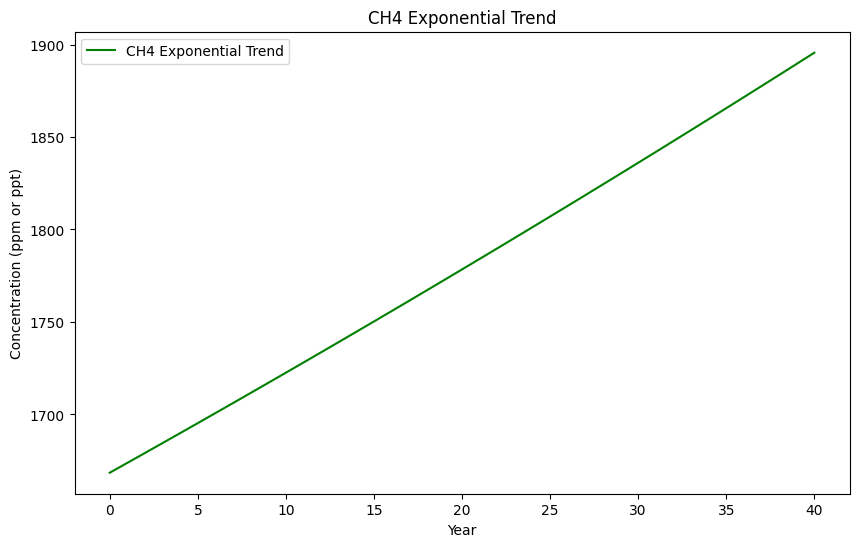

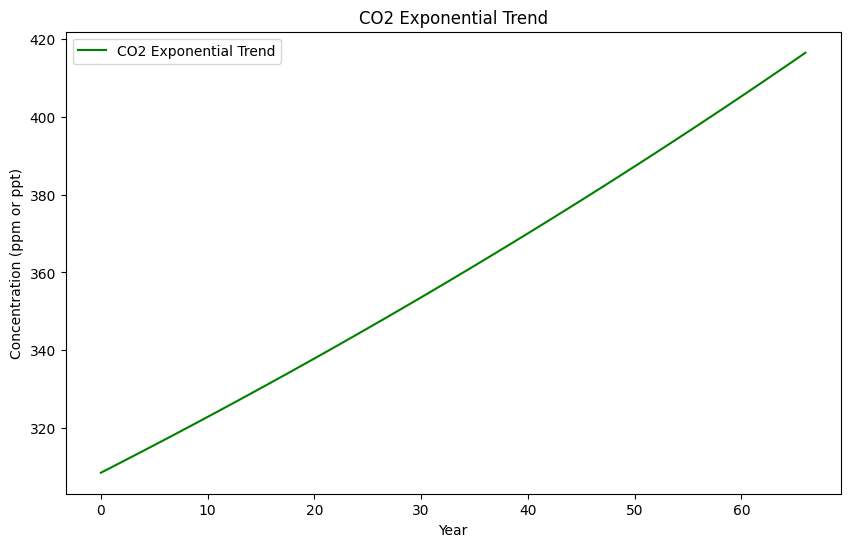

In [25]:
import numpy as np


def exponential_regression(data):
    X = np.array(data['year']).reshape(-1, 1)
    y = np.log(data['average'])
    model = LinearRegression().fit(X, y)
    trend = np.exp(model.predict(X))
    return trend

ch4_yearly['exp_trend'] = exponential_regression(ch4_yearly)
co2_yearly['exp_trend'] = exponential_regression(co2_yearly)

def plot_exponential_trend(data, gas_name):
    plt.figure(figsize=(10, 6))
    plt.plot(data['year'], data['exp_trend'], color='green', label=f'{gas_name} Exponential Trend')
    plt.title(f'{gas_name} Exponential Trend')
    plt.xlabel('Year')
    plt.ylabel('Concentration (ppm or ppt)')
    plt.legend()
    plt.show()

plot_exponential_trend(ch4_yearly, 'CH4')
plot_exponential_trend(co2_yearly, 'CO2')


La régression exponentielle semble souvent plus pertinente pour les tendances à long terme des gaz à effet de serre.

Conclusion

Cette analyse détaillée des séries temporelles des gaz à effet de serre met en évidence les tendances et les variations saisonnières des concentrations de CO2, CH4, N2O et SF6. Les méthodes de décomposition additive et multiplicative offrent des perspectives complémentaires sur les dynamiques des données. Les régressions linéaires et exponentielles permettent de modéliser et de prévoir les tendances futures, fournissant ainsi des outils précieux pour la compréhension et la gestion des gaz à effet de serre dans l'atmosphère.